# Visual Exploration of Strava Data

##### Varshini Rana

### Introduction

Professor Chris Brooks started increasing his exercise over the summer of 2019 and collecting data on what he was doing. Throughout the summer, he bought a variety of devices (heart rate monitor, watch, bicycle, etc.), and began publishing this data to the social sharing site Strava. Professor Brooks wants to understand this data on a deeper level.

In this notebook, I will be exploring the strava.csv dataset as gathered by Professor Brooks to explore the attributes of certain key variables in it, their distributions, and how they correlate to one another.

I have made references to some of the rules highlighted in the article ["Ten simple rules for writing and sharing computational analyses in Jupyter Notebooks"](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1007007) by Rule et al. as follows:

#### Rule 1: Tell a story for an audience

The notebook attempts to create a computational narrative for the client Professor Brooks (and for anyone who wants to reproduce this analysis) by first introducing the premise of the data, then going on to describing the steps for the visual analyses and the implicit rationale behind them, and ending with insights on the visual analyses.

#### Rule 2: Document the process, not just the results

Explanatory text is provided throughout the notebook and for every step of the analyses undertaken, both in the form of markdown text, as well as code cell comments. This is to enable clear documentation for why and how each step was taken in order to enhance reproducibility and comprehension.

#### Rule 3: Use cell divisions to make steps clear

Each main step of the analyses undertaken is given a cell in the notebook along with explanatory text, making it easier to follow what is being done and why. For example, the data cleaning steps are kept separate from plot creation steps in different cells, so that it is easy to determine when one step ends and when the other begins.

#### Rule 5: Record Dependencies

The following libraries are the dependencies for the code that follows and can be installed with the command: `pip install <library name>`

In [1]:
# let us import the required libraries
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

By listing the required libraries in one cell and indicating the command to install them, I have ensured that all dependencies are kept in one place and are easily accessible by anyone who would want to reproduce this analysis without the hassle of confronting undocumented dependencies in the code below.

### Exploratory Data Analysis

In [2]:
# we want to be able to see all of the columns in the dataframe, so let us set an arbitrary number of 1000 columns to display
pd.options.display.max_columns=1000

In [3]:
# let us import the dataset and look at the first 5 rows
df=pd.read_csv("/home/jovyan/work/resources/assets/strava.csv")
df.head()

,Air Power,Cadence,Form Power,Ground Time,Leg Spring Stiffness,Power,Vertical Oscillation,altitude,cadence,datafile,distance,enhanced_altitude,enhanced_speed,fractional_cadence,heart_rate,position_lat,position_long,speed,timestamp,unknown_87,unknown_88,unknown_90
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,activities/2675855419.fit.gz,0.00,NaN,0.000,0.0,68.0,NaN,NaN,0.0,2019-07-08 21:04:03,0.0,300.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,activities/2675855419.fit.gz,0.00,NaN,0.000,0.0,68.0,NaN,NaN,0.0,2019-07-08 21:04:04,0.0,300.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,activities/2675855419.fit.gz,1.32,NaN,1.316,0.0,71.0,NaN,NaN,1316.0,2019-07-08 21:04:07,0.0,300.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3747.0,77.0,activities/2675855419.fit.gz,12.19,249.4,1.866,0.0,77.0,504432050.0,-999063637.0,1866.0,2019-07-08 21:04:14,0.0,100.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3798.0,77.0,activities/2675855419.fit.gz,14.08,259.6,1.894,0.0,80.0,504432492.0,-999064534.0,1894.0,2019-07-08 21:04:15,0.0,100.0,NaN


We can see that there is quite a lot of Stryd and general endurance training terminology in the dataset based on the column names. We will take a closer look at some of them as we proceed with the analysis.

In [4]:
# let us get an idea of how many rows and columns there are in this dataset
df.shape

(40649, 22)

There are 40649 rows and 22 columns in this dataset.

In [5]:
# let us get an idea of how many null values there are in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40649 entries, 0 to 40648
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Air Power             17842 non-null  float64
 1   Cadence               17847 non-null  float64
 2   Form Power            17842 non-null  float64
 3   Ground Time           17847 non-null  float64
 4   Leg Spring Stiffness  17842 non-null  float64
 5   Power                 17847 non-null  float64
 6   Vertical Oscillation  17847 non-null  float64
 7   altitude              14905 non-null  float64
 8   cadence               40627 non-null  float64
 9   datafile              40649 non-null  object 
 10  distance              40649 non-null  float64
 11  enhanced_altitude     40598 non-null  float64
 12  enhanced_speed        40639 non-null  float64
 13  fractional_cadence    40627 non-null  float64
 14  heart_rate            38355 non-null  float64
 15  position_lat       

The first few columns have quite a large number of null values, and we also have no idea what the "unknown" columns are supposed to denote. Already, we are getting an inkling of what columns to focus on in our analysis.

Based on some digging around, I found out that the data for the variety of fitness devices and activities employed by Professor Brooks were actually encapsulated in the series of .fit files in the "datafile" column of this dataset. Let us make these activities distinct by extracting the activity IDs from the .fit file names.

In [6]:
# let us extract the activity IDs from the "datafile" column
df["Activity ID"]=df["datafile"].str.split("/").str[1].str.split(".").str[0]
df.head()

,Air Power,Cadence,Form Power,Ground Time,Leg Spring Stiffness,Power,Vertical Oscillation,altitude,cadence,datafile,distance,enhanced_altitude,enhanced_speed,fractional_cadence,heart_rate,position_lat,position_long,speed,timestamp,unknown_87,unknown_88,unknown_90,Activity ID
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,activities/2675855419.fit.gz,0.00,NaN,0.000,0.0,68.0,NaN,NaN,0.0,2019-07-08 21:04:03,0.0,300.0,NaN,2675855419
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,activities/2675855419.fit.gz,0.00,NaN,0.000,0.0,68.0,NaN,NaN,0.0,2019-07-08 21:04:04,0.0,300.0,NaN,2675855419
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,activities/2675855419.fit.gz,1.32,NaN,1.316,0.0,71.0,NaN,NaN,1316.0,2019-07-08 21:04:07,0.0,300.0,NaN,2675855419
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3747.0,77.0,activities/2675855419.fit.gz,12.19,249.4,1.866,0.0,77.0,504432050.0,-999063637.0,1866.0,2019-07-08 21:04:14,0.0,100.0,NaN,2675855419
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3798.0,77.0,activities/2675855419.fit.gz,14.08,259.6,1.894,0.0,80.0,504432492.0,-999064534.0,1894.0,2019-07-08 21:04:15,0.0,100.0,NaN,2675855419


Activity IDs have been successfully extracted from the "datafile" column and are stored in the column "Activity ID" towards the extreme right. I wonder how many activities Professor Brooks indulged in.

In [7]:
# we will look at the unique number of activities based on the values in the "Activity ID" column
df["Activity ID"].nunique()

64

64 activities... That's interesting. Based on some input from Professor Brooks, he claims that there were some activities where he ran then stopped for a while then ran again. This could lead to the creation of multiple Activity IDs. Perhaps, the term "Activity ID" was a misnomer. "Session ID" might be more appropriate.

In [8]:
# let us rename the "Activity ID" column to "Session ID"
df.rename(columns={"Activity ID":"Session ID"}, inplace=True)
df.head()

,Air Power,Cadence,Form Power,Ground Time,Leg Spring Stiffness,Power,Vertical Oscillation,altitude,cadence,datafile,distance,enhanced_altitude,enhanced_speed,fractional_cadence,heart_rate,position_lat,position_long,speed,timestamp,unknown_87,unknown_88,unknown_90,Session ID
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,activities/2675855419.fit.gz,0.00,NaN,0.000,0.0,68.0,NaN,NaN,0.0,2019-07-08 21:04:03,0.0,300.0,NaN,2675855419
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,activities/2675855419.fit.gz,0.00,NaN,0.000,0.0,68.0,NaN,NaN,0.0,2019-07-08 21:04:04,0.0,300.0,NaN,2675855419
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,activities/2675855419.fit.gz,1.32,NaN,1.316,0.0,71.0,NaN,NaN,1316.0,2019-07-08 21:04:07,0.0,300.0,NaN,2675855419
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3747.0,77.0,activities/2675855419.fit.gz,12.19,249.4,1.866,0.0,77.0,504432050.0,-999063637.0,1866.0,2019-07-08 21:04:14,0.0,100.0,NaN,2675855419
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3798.0,77.0,activities/2675855419.fit.gz,14.08,259.6,1.894,0.0,80.0,504432492.0,-999064534.0,1894.0,2019-07-08 21:04:15,0.0,100.0,NaN,2675855419


Much better! Now, let us pick particular columns which I think might be helpful in getting some insights from this data.

In [9]:
df=df.loc[:, ["Session ID", "altitude", "cadence", "distance", "enhanced_altitude", "enhanced_speed", "heart_rate", "timestamp"]]
df.head()

,Session ID,altitude,cadence,distance,enhanced_altitude,enhanced_speed,heart_rate,timestamp
0,2675855419,NaN,0.0,0.00,NaN,0.000,68.0,2019-07-08 21:04:03
1,2675855419,NaN,0.0,0.00,NaN,0.000,68.0,2019-07-08 21:04:04
2,2675855419,NaN,54.0,1.32,NaN,1.316,71.0,2019-07-08 21:04:07
3,2675855419,3747.0,77.0,12.19,249.4,1.866,77.0,2019-07-08 21:04:14
4,2675855419,3798.0,77.0,14.08,259.6,1.894,80.0,2019-07-08 21:04:15


That looks much more manageable than what we started out with! The excluded columns had way too many null values and unknowns associated with them, which is why we shall leave them out for now.

In [10]:
# let us get some summary statistics on these columns
df.describe()

,altitude,cadence,distance,enhanced_altitude,enhanced_speed,heart_rate
count,14905.000000,40627.000000,40649.000000,40598.000000,40639.000000,38355.000000
mean,3846.184368,72.781254,4097.140051,271.346027,3.037084,134.680094
std,134.262498,17.743728,5827.964663,25.035768,1.959805,18.713782
min,3555.000000,0.000000,0.000000,209.000000,0.000000,56.000000
25%,3768.000000,74.000000,1117.970000,252.800000,2.109000,121.000000
50%,3829.000000,78.000000,2430.500000,269.200000,2.445000,136.000000
75%,3912.000000,80.000000,4403.730000,291.200000,2.809000,148.000000
max,5043.000000,118.000000,39007.120000,508.600000,15.349000,183.000000


I am not a big fan of too many numbers. Visualizing these statistics might be a good way to go.

In [11]:
# we will exclude position coordinates from the summary statistics
summary_df=df.describe()
# let us also remove the count and std elements from the dataframe
summary_df.drop(["count", "std"], axis=0, inplace=True)
summary_df

,altitude,cadence,distance,enhanced_altitude,enhanced_speed,heart_rate
mean,3846.184368,72.781254,4097.140051,271.346027,3.037084,134.680094
min,3555.000000,0.000000,0.000000,209.000000,0.000000,56.000000
25%,3768.000000,74.000000,1117.970000,252.800000,2.109000,121.000000
50%,3829.000000,78.000000,2430.500000,269.200000,2.445000,136.000000
75%,3912.000000,80.000000,4403.730000,291.200000,2.809000,148.000000
max,5043.000000,118.000000,39007.120000,508.600000,15.349000,183.000000


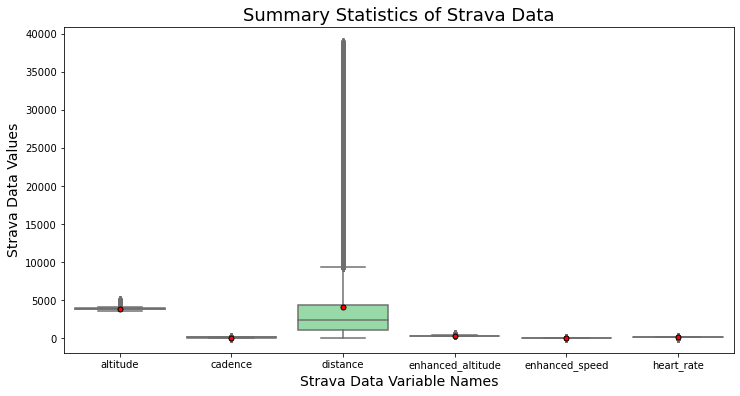

In [12]:
# let us get our first visual cues into these stats
plt.figure(figsize=(12,6))
# setting showmeans=True enables us to see the mean values in the box plots
sns.boxplot(data=df, showmeans=True, palette="pastel", meanprops={"marker":"o",
                                                                          "markerfacecolor":"red", 
                                                                          "markeredgecolor":"black",
                                                                          "markersize":"5"})
plt.title("Summary Statistics of Strava Data", size=18)
plt.xlabel("Strava Data Variable Names", size=14)
plt.ylabel("Strava Data Values", size=14)
plt.show()

Box plots are the best way to visualize summary statistics of numeric data, as we can immediately understand the where the minimum, the first quartile (25%), the median or the second quartile (50%), the third quartile (75%), and the maximum lie. Outliers are also immediately visible. In this case, we see an extreme outlier with "distance" values. 

We can also overlay the mean on it by setting showmeans=True while using the Seaborn library. This gives us a handy estimate of the distribution of data.

Because of the outlier, we find it difficult to zone in on the relevant aspects of the box plots. The box plots of the "cadence", "enhanced_altitude", "enhanced_speed" and "heart_rate" columns are practically just horizontal lines, which we can't glean much information from. We could probably get a clearer look at the plots on "zooming in" to those parts. This can be done by excluding the outliers in the "distance" column (which has a maximum value of ~40000) or by limiting the Y-axis values, as follows.

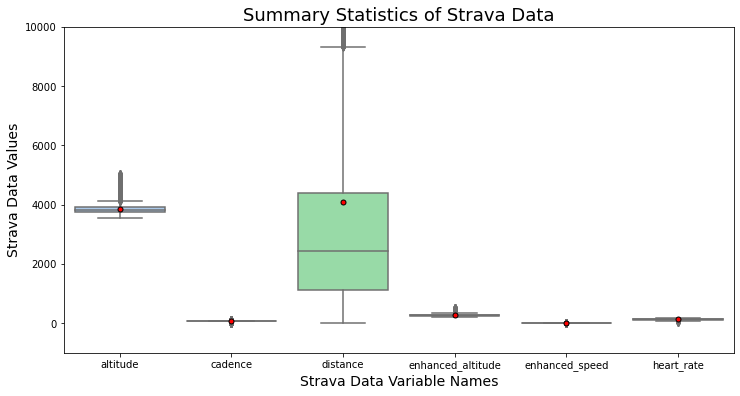

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, showmeans=True, palette="pastel", meanprops={"marker":"o",
                                                                          "markerfacecolor":"red", 
                                                                          "markeredgecolor":"black",
                                                                          "markersize":"5"})
plt.title("Summary Statistics of Strava Data", size=18)
plt.xlabel("Strava Data Variable Names", size=14)
plt.ylabel("Strava Data Values", size=14)
# set Y-axis limits to exclude the upper outliers
plt.ylim(-1000, 10000)
plt.show()

Visually, there's not too much of an improvement, but at least they aren't just horizontal lines!

In every case except "distance", the values seem to closely match each other within their respective categories and do not vary too greatly. In the case of "distance", however, we see a wide variation in values ranging from 0 to ~40000, with a mean of ~4000.

When talking about numeric data, histograms are almost always necessary to get an idea of the frequency distribution of the data.

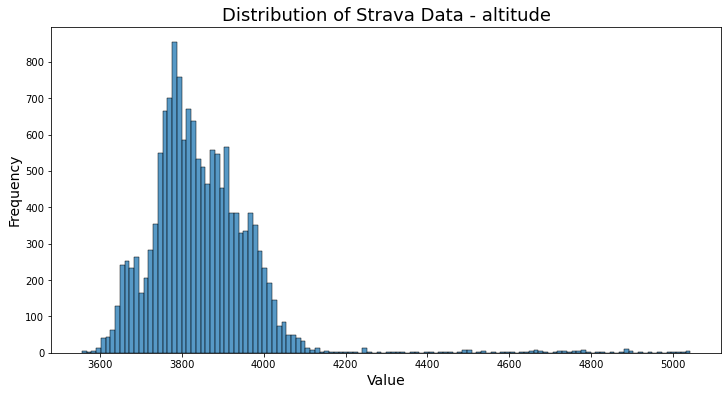

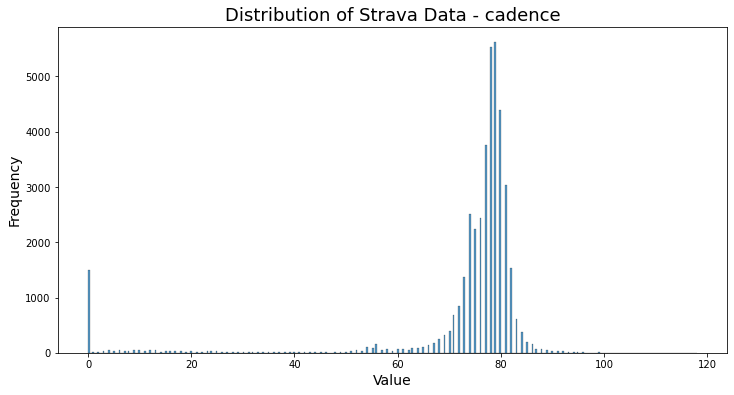

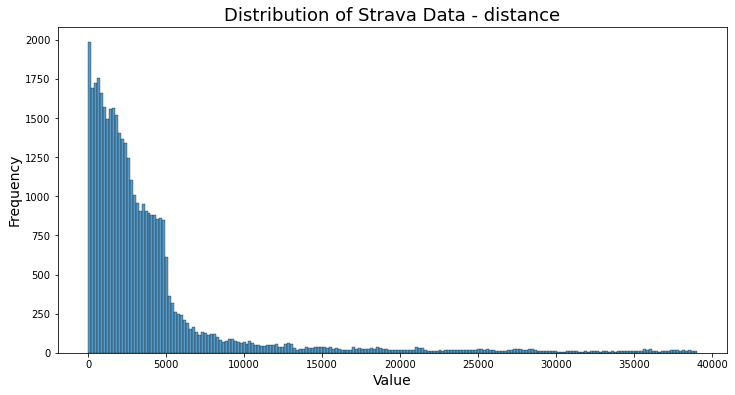

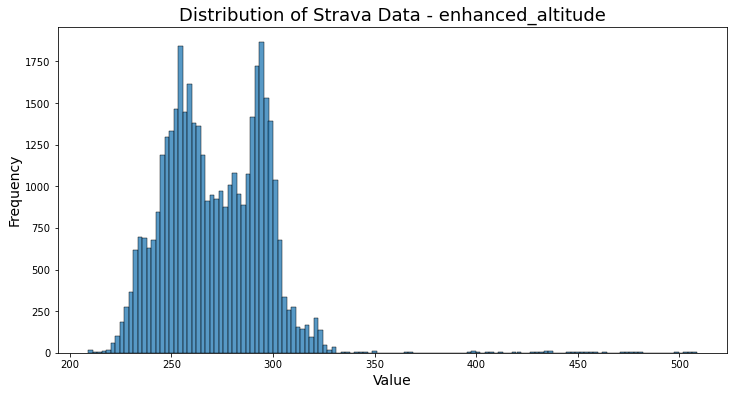

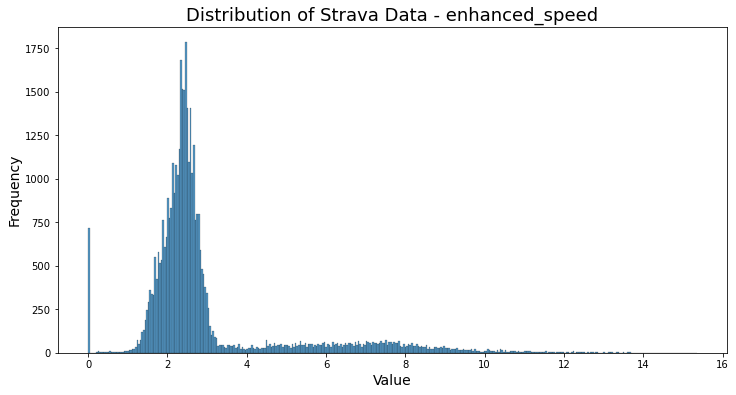

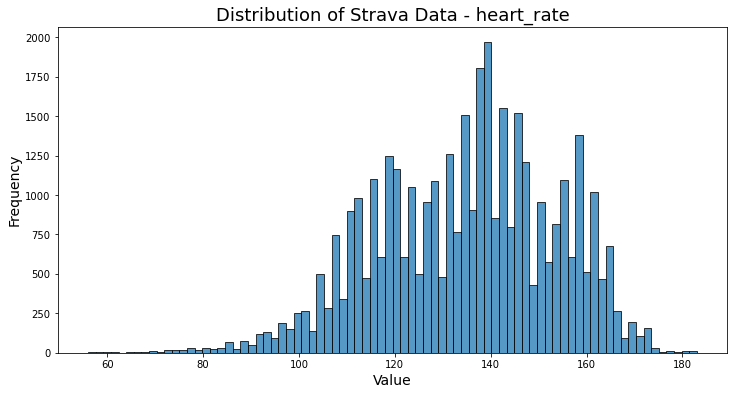

In [14]:
# let's create histograms for relevant numeric columns in the dataset
for i in df.drop(["Session ID", "timestamp"], axis=1).columns:
    plt.figure(figsize=(12,6))
    sns.histplot(data=df[i], palette="pastel")
    plt.title("Distribution of Strava Data - "+i, size=18)
    plt.xlabel("Value", size=14)
    plt.ylabel("Frequency", size=14)
    plt.show()

As we can see, the spread, skew, and modality of these data are completely different to one another. The distributions for "altitude", "distance", "enhanced_speed", and even "enhanced_altitude" to some extent are skewed to the right, while "cadence" and "heart_rate" seem to be skewed to the left. While most of the distributions above are unimodal, some, such as "enhanced_altitude" and "heart_rate" are bimodal and trimodal respectively. Some distributions also show outliers, such as the histograms for "cadence" and "enhanced_speed" with outliers to the extreme left. This is an extremely valuable way to visualize data when summary statistics do not give much information.

Looking at the "timestamp" column gave me an idea. Would it be possible to assess what Professor Brooks' most active days of the week were? Using timestamps, it is possible to glean not only the day of the week, but also the period of time (example: morning, afternoon, night, etc.). Let us try this out.

In [15]:
# first, we need to convert the "timestamp" column's data type to datetime
df["timestamp"]=pd.to_datetime(df["timestamp"])
# next, we can figure out the day of the week of the timestamps using the datetime library
df["day"]=df["timestamp"].dt.day_name()
# finally, we can assign a time period based on the hour of the timestamps
df=df.assign(time_period=pd.cut(x=df["timestamp"].dt.hour, bins=[0,5,12,17,21,24], labels=["Night","Morning","Afternoon","Evening","Night"], 
                                include_lowest=True, ordered=False))
# let's take a look at the dataframe
df.sample(5)

,Session ID,altitude,cadence,distance,enhanced_altitude,enhanced_speed,heart_rate,timestamp,day,time_period
12308,2752548971,3882.0,81.0,2213.60,276.4,2.389,143.0,2019-08-05 22:01:00,Monday,Night
34889,2875620974,NaN,34.0,7265.61,277.6,7.577,NaN,2019-09-15 22:23:41,Sunday,Night
27082,2803436608,NaN,78.0,1700.75,290.4,2.557,142.0,2019-08-23 01:36:54,Friday,Night
21120,2796808375,NaN,80.0,2585.94,247.8,2.333,149.0,2019-08-20 20:53:52,Tuesday,Evening
18941,2796644542,NaN,79.0,2835.96,249.8,2.426,140.0,2019-08-20 19:37:52,Tuesday,Evening


Our new columns seem to be showing the expected values. Now that we have the day of the week and the time_period of the exercise sessions, we can now try to visualize them using a bar plot, which is best when we have categorical data that we want to compare against a quantitative variable, which would be the number of exercise sessions in this case.

In [16]:
# let us first group by the number of sessions based on "Session ID"
num_sessions=df.groupby(["day","time_period"])["Session ID"].nunique().reset_index()
# we need to rename the "Session ID" column into something more appropriate
num_sessions.rename(columns={"Session ID":"number_of_sessions"}, inplace=True)
num_sessions.head()

,day,time_period,number_of_sessions
0,Friday,Afternoon,0
1,Friday,Evening,4
2,Friday,Morning,0
3,Friday,Night,2
4,Monday,Afternoon,0


Some of the values in the "number_of_sessions" column are 0 since there were no workouts for that day and that time period. We can now visualize this as a bar plot.

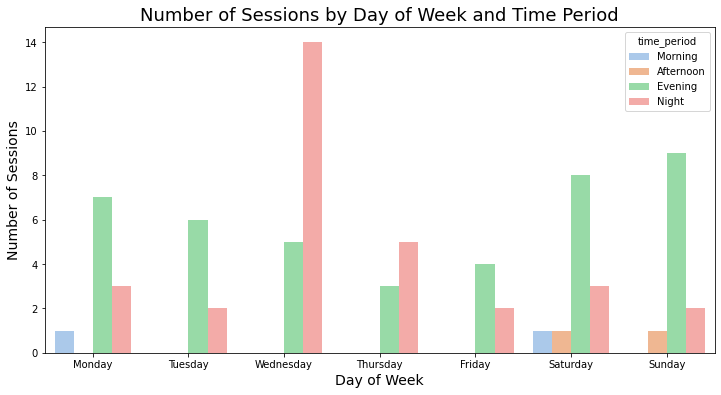

In [17]:
plt.figure(figsize=(12,6))
# set the order of appearance of the days of the week
day_order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
sns.barplot(x="day", y="number_of_sessions", order=day_order, hue="time_period", hue_order=["Morning","Afternoon","Evening","Night"], palette="pastel",
            data=num_sessions)
plt.title("Number of Sessions by Day of Week and Time Period", size=18)
plt.xlabel("Day of Week", size=14)
plt.ylabel("Number of Sessions", size=14)
plt.show()

Using bars which are grouped together, we are able to visualize categorization of number of sessions based on the day of the week, as well as time period.

Professor Brooks seems to be extremely active on Wednesday nights, contrary to what might be an assumption that most people exercise a lot during the weekends as opposed to the middle of the week. However, we see that Professor Brooks works out in more time periods (all four on Saturday, three on Sunday) on the weekends, compared to the weekdays, affording some merit to the assumption that people are more free during weekends to indulge in such activities compared to weekdays.

Based on this plot, we can also see that Professor Brooks seems to be a "night person", as most of his workouts seem to occur during evenings and nights, with only two workouts — Monday ("Monday Motivation"?) and Saturday (first leisure day of the week?) — occurring during the mornings.

Moving on to an interesting topic, a pandas Correlation Matrix calculates the pairwise Pearson correlation coefficient of each column in the dataframe. The values of the matrix range from -1 to 1. Values close to 1 denote positive correlation, values close to -1 denote negative correlation, while values close to 0 denote no correlation.

In [18]:
# a correlation matrix can be created with this simple code using pandas
df.corr()

,altitude,cadence,distance,enhanced_altitude,enhanced_speed,heart_rate
altitude,1.000000,-0.083869,-0.036738,1.000000,-0.036491,-0.166704
cadence,-0.083869,1.000000,-0.116760,0.095441,-0.097341,0.268619
distance,-0.036738,-0.116760,1.000000,-0.193163,0.513813,0.075619
enhanced_altitude,1.000000,0.095441,-0.193163,1.000000,-0.181469,0.206821
enhanced_speed,-0.036491,-0.097341,0.513813,-0.181469,1.000000,0.133977
heart_rate,-0.166704,0.268619,0.075619,0.206821,0.133977,1.000000


Again, this mishmash of numbers makes it hard to immediately draw any conclusions about what's going on. We can visualize this as a Heatmap.

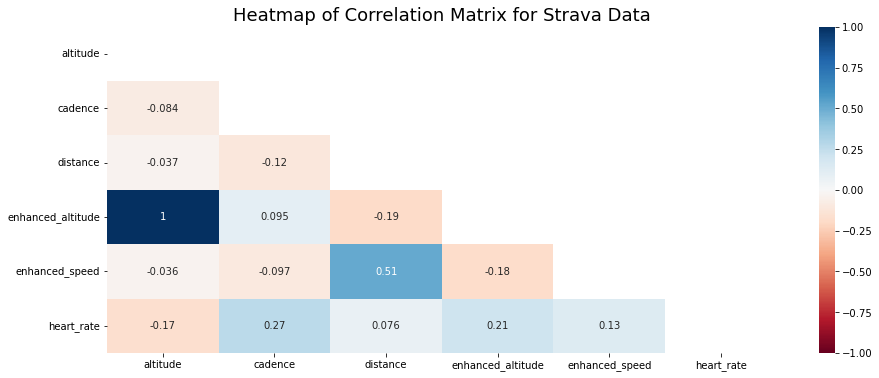

In [19]:
plt.figure(figsize=(15,6))
# we can create a mask to remove redundant elements (the upper triangle) using numpy triu() and ones_like() functionalities
mask=np.triu(np.ones_like(df.corr(), dtype=np.bool))
# we then set this mask value as a parameter in the heatmap function
sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='RdBu')
plt.title("Heatmap of Correlation Matrix for Strava Data", size=18)
plt.show()

The more blue the "rectangle" of the heatmap is, the more correlated the specified column values are. For example, there seems to be a slight positive correlation between "enhanced_speed" and "distance", suggesting that if one increases, the other will also increase (which makes intuitive sense, as the faster you run, the more distance you'll cover in a certain time). There is a perfect positive correlation between "enhanced_altitude" and "altitude", which doesn't come as much of a surprise, since "enhanced_altitude" is likely derived from "altitude". There are also some slight negative correlations (denoted by the red end of the spectrum), but there seems to be not much correlation among these variables for the most part.

As expected, heatmaps remain the best choice to visualize this type of data, as the differences are immediately apparent due to the color contrast, enabling accurate conclusions to be drawn more efficiently.